In [40]:
# import required libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
# for 3d plot
from mpl_toolkits import mplot3d
# Import dataset with pandas
df = pd.read_csv ("4907/Data_2sets.csv")

In [55]:
# remove the label 
df = df.drop(['Index'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Height(Inches)  5840 non-null   float64
 1   Weight(Pounds)  5840 non-null   float64
dtypes: float64(2)
memory usage: 91.4 KB


In [56]:
# standardize the data features onto unit scale 
x = np.array(df)
scaler = StandardScaler()
print(scaler.fit(x))
print(scaler.mean_)
x = scaler.transform(x)
print(scaler.transform(x))

StandardScaler()
[ 67.96957755 127.20301848]
[[-35.92501174 -11.11481714]
 [-34.37598297 -10.93885293]
 [-34.94795263 -10.81497967]
 ...
 [-35.1327097  -10.88934062]
 [-35.12233221 -10.96140455]
 [-35.72730444 -11.11468607]]


In [57]:
# add PCA decomposition to 2 variables 
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDF = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principals = np.array(principalDF)
print(principalDF)

      principal component 1  principal component 2
0                  1.673257              -0.065950
1                 -1.871490              -0.735199
2                 -2.105623               1.054928
3                 -1.016820               0.835213
4                 -0.979245               1.112877
...                     ...                    ...
5835              -1.448875               0.857978
5836               2.052965               0.401486
5837              -1.246736               0.698655
5838              -0.672039               0.095727
5839               1.403263              -0.333802

[5840 rows x 2 columns]


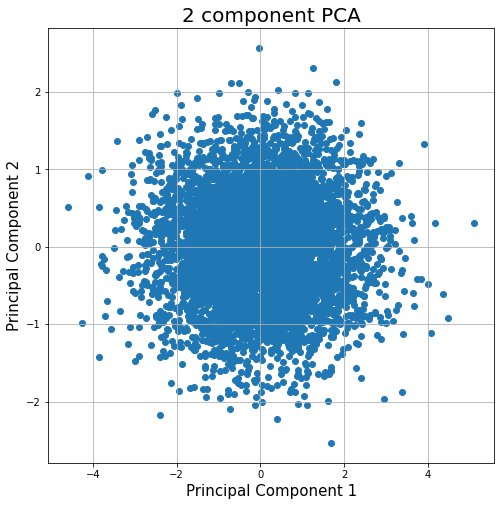

In [59]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20) 
ax.scatter(principals[:,0], principals[:,1])
ax.grid()

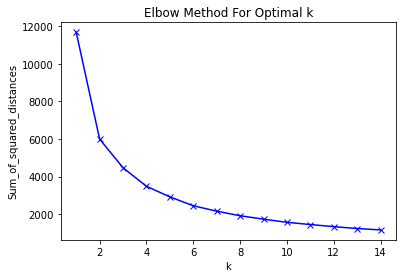

In [60]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(principals)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [61]:
# Apply Kmeans using 3 clusters 
kmeans = KMeans(n_clusters=4)
kmeans.fit(principals)
# Print the centroid locations
print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[ 0.14287329  0.65018098]
 [-1.56553003  0.02316007]
 [-0.01947156 -0.57715684]
 [ 1.62432797 -0.05615482]]
[3 1 1 ... 1 1 3]


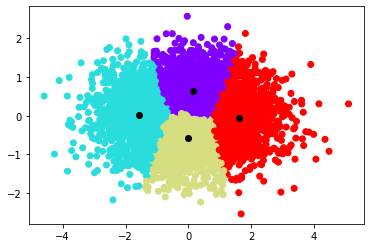

In [62]:
# Black points are centroids, colored points are all values closest to a centroid
# C = value of which centroid a datapoint belongs to, each C has a unique color, represented on the graph via cmap
plt.scatter(principals[:,0],principals[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')

For n_clusters = 2 The average silhouette_score is : 0.405858355278128
For n_clusters = 3 The average silhouette_score is : 0.32695692502016976
For n_clusters = 4 The average silhouette_score is : 0.33739866458615303
For n_clusters = 5 The average silhouette_score is : 0.3207622146911761
For n_clusters = 6 The average silhouette_score is : 0.32562051714086726
For n_clusters = 7 The average silhouette_score is : 0.3199920762045725
For n_clusters = 8 The average silhouette_score is : 0.3204556951909591
For n_clusters = 9 The average silhouette_score is : 0.32091015252189
For n_clusters = 10 The average silhouette_score is : 0.3199698155123362
For n_clusters = 11 The average silhouette_score is : 0.31813855745929986
For n_clusters = 12 The average silhouette_score is : 0.32476175634848226
For n_clusters = 13 The average silhouette_score is : 0.3210314456943055
For n_clusters = 20 The average silhouette_score is : 0.3225150547527538


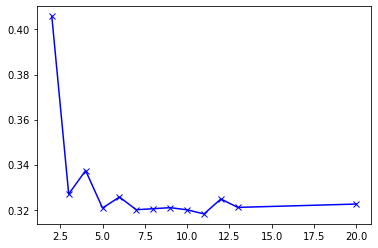

In [63]:
# Silhoutte method
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 20]
silhouette_scores = [0]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(principals)
    silhouette_avg = silhouette_score(principals, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
silhouette_scores.pop(0)
plt.plot(range_n_clusters, silhouette_scores, 'bx-')

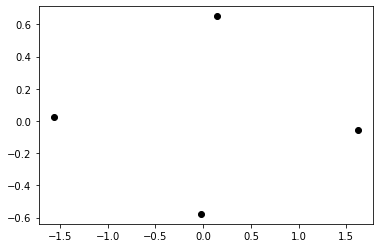

In [64]:
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')

In [66]:
# add PCA decomposition to 2 variables 
pca3 = PCA(n_components=4)
principalComponents3 = pca3.fit_transform(x)
principalDF3 = pd.DataFrame(data = principalComponents3
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principals3 = np.array(principalDF3)
print(principalDF3)
km = KMeans(n_clusters=3)
km.fit(principals3)
print(km.labels_)
print(km.cluster_centers_)

ValueError: n_components=4 must be between 0 and min(n_samples, n_features)=2 with svd_solver='full'

Text(2.46110258, 2.63606279, '(2.46110258,  2.63606279,  0.21743436)')

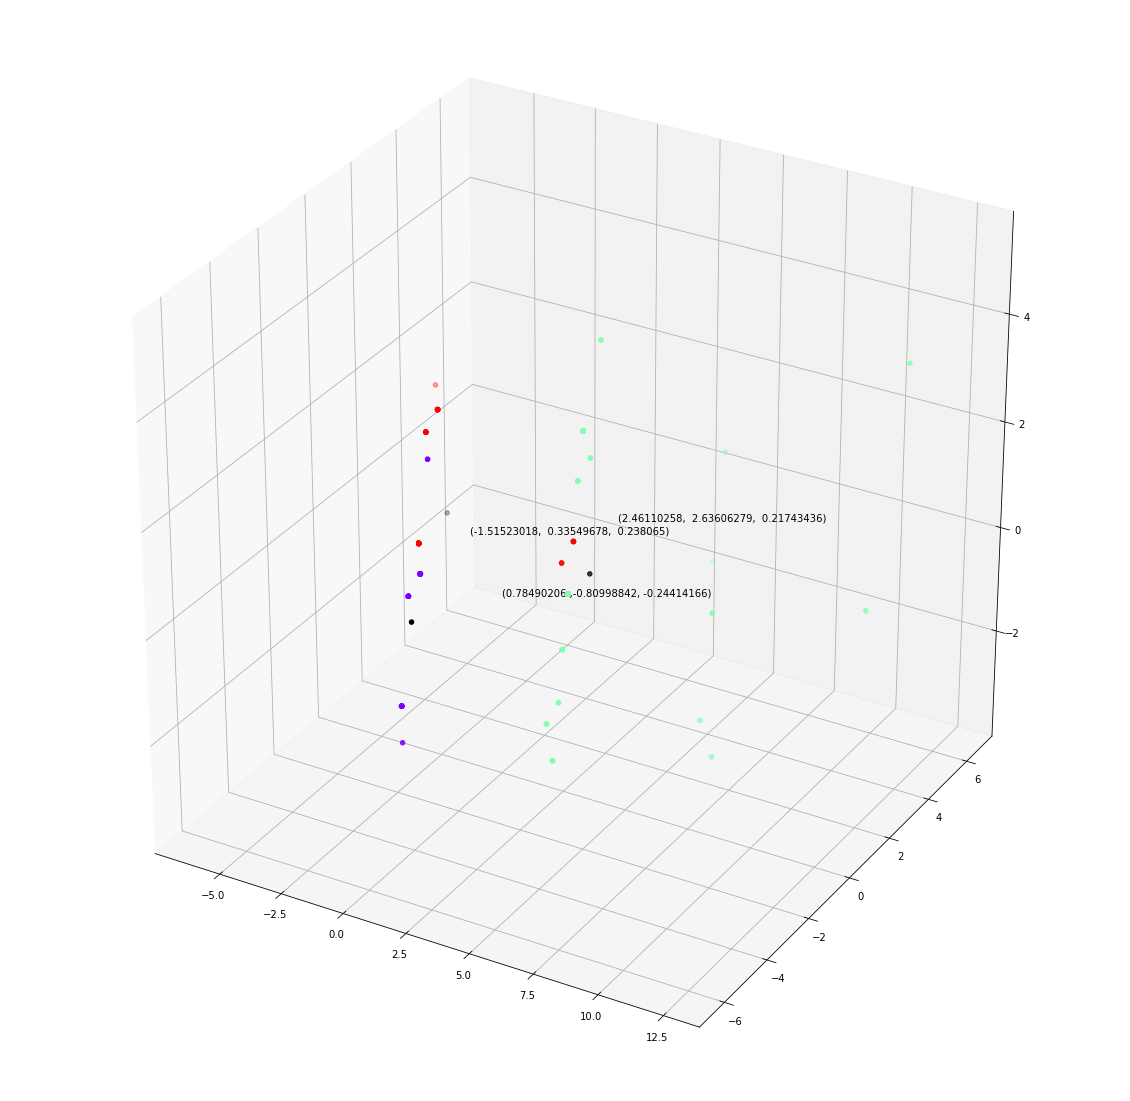

In [28]:
# testing 3d plot
plt.figure(figsize=(20,20))
test3D = plt.axes(projection='3d')
test3D.scatter3D(principals3[:,0],principals3[:,1],principals3[:,2], c=km.labels_, cmap='rainbow')
test3D.scatter3D(km.cluster_centers_[:,0] ,km.cluster_centers_[:,1], km.cluster_centers_[:,2], color='black')
# annotation (MANUALLY ADDED CENTROID POSITIONS FROM km.cluster_centers_)
test3D.text(0.78490206 ,-0.80998842, -0.24414166, "(0.78490206 ,-0.80998842, -0.24414166)", color='black')
test3D.text(-1.51523018,  0.33549678,  0.238065 , "(-1.51523018,  0.33549678,  0.238065)", color='black')
test3D.text(2.46110258,  2.63606279,  0.21743436, "(2.46110258,  2.63606279,  0.21743436)", color='black')

In [29]:
# print (pca.inverse_transform(kmeans.cluster_centers_))
print (kmeans.cluster_centers_[0])

[-1.00984521 -2.87653038]


In [68]:
# Identify the closest points to one centroid and store the index of said point within an array
# Currently manual, have to identify a way to automate this process for X number of centroids identified by the user 
# requires import from sklearn.metrics import pairwise_distances_argmin_min
centroid_1 = np.array(kmeans.cluster_centers_[0])
centroid_2 = np.array(kmeans.cluster_centers_[1])
centroid_3 = np.array(kmeans.cluster_centers_[2])
centroid_4 = np.array(kmeans.cluster_centers_[2])
centroid_1 = centroid_1.reshape(1,-1)
centroid_2 = centroid_2.reshape(1,-1)
centroid_3 = centroid_3.reshape(1,-1)
centroid_4 = centroid_4.reshape(1,-1)
closest_1 = pairwise_distances_argmin_min(centroid_1, principals)
closest_2 = pairwise_distances_argmin_min(centroid_2, principals)
closest_3 = pairwise_distances_argmin_min(centroid_3, principals)
closest_4 = pairwise_distances_argmin_min(centroid_4, principals)

In [69]:
# Using the index of previously identified points, output the corresponding index from the original dataset
# Here the first index (0) is used since that is the point closest to the centroid AFTER standardization and PCA decomposition 
print(principals[closest_1[0]])
test_points = np.array(df)
print(test_points[closest_1[0]])
print(principals[closest_2[0]])
print(test_points[closest_2[0]])
print(principals[closest_3[0]])
print(test_points[closest_3[0]])
print(principals[closest_4[0]])
print(test_points[closest_4[0]])

[[0.15574758 0.65290042]]
[[ 66.86965 131.2651 ]]
[[-1.56269024  0.0316405 ]]
[[ 70.05212 140.2298 ]]
[[ 0.00989258 -0.5498054 ]]
[[ 68.70397 122.6299 ]]
[[ 0.00989258 -0.5498054 ]]
[[ 68.70397 122.6299 ]]


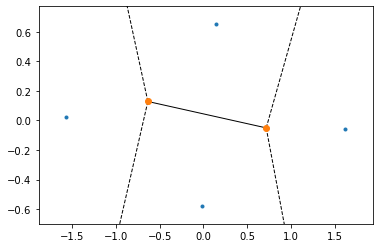

In [67]:
#voronoi
from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(kmeans.cluster_centers_)
fig = voronoi_plot_2d(vor)
plt.show()

In [75]:
# Checking which region a point falls under using a query tree
from scipy.spatial import cKDTree
# Use centroids as the points to index around 
voronoi_kdtree = cKDTree(kmeans.cluster_centers_)
# Example points, but can take user input for the same purpose
samplePoints = [[-1.4, -0.4], [-0.5, -0.2], [-0.5, 0.3], [1.1, -0.4]]
# Query has two outputs, first is an array containing the distance to the nearest neighbours, second is an array containing
# the index of centroid the tested points fall into (in this case, the index of kmeans.cluster_centers_)
test_point_dist, test_point_regions = voronoi_kdtree.query(samplePoints)
test_point_regions

(array([0.45438379, 0.61086403, 0.73206064, 0.62701621]), array([1, 2, 0, 3]))

In [73]:
# Comparing the output region to the centroid values, the sample points fall in line with the voronoi diagram
kmeans.cluster_centers_

array([[ 0.14287329,  0.65018098],
       [-1.56553003,  0.02316007],
       [-0.01947156, -0.57715684],
       [ 1.62432797, -0.05615482]])

array([0.45438379, 0.61086403, 0.73206064, 0.62701621])